# Stable Diffusion

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/bacalhau-project/examples/blob/main/model-inference/stable-diffusion/index.ipynb)
[![Open In Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/bacalhau-project/examples/HEAD?labpath=model-inference/stable-diffusion/index.ipynb)


[Stable Diffusion](https://github.com/CompVis/stable-diffusion) is a state of the art text-to-image model that generates images from text.

it was developed as an open source alternative to [DALL·E 2](https://openai.com/dall-e-2/) from OpenAI

To generate an Image you need to provide a prompt which is a description of the Image you want to generate


#### **Prompt**


```
Speed of Light
```
#### **Output**
![](https://i.imgur.com/cCuXiWe.jpg)



## **Running Stable-Diffusion Locally**

To run stable diffusion locally follow these steps

Clone this repository [https://github.com/js-ts/stable_diffusion.openvino](https://github.com/js-ts/stable_diffusion.openvino)




In [ ]:
%%bash
git clone https://github.com/js-ts/stable_diffusion.openvino

After cloning change directory into the repository


In [ ]:
%%bash
cd stable_diffusion.openvino

Installing prerequisites


In [ ]:
%%bash
sudo apt-get update
sudo apt-get install -y libgl1 libglib2.0-0 git-lfs

Install git lfs to download the model and diffuser


In [ ]:
%%bash
git lfs install

Error: Failed to call git rev-parse --git-dir --show-toplevel: "fatal: not a git repository (or any of the parent directories): .git\n"
Git LFS initialized.


Clone the Model and Diffuser


In [ ]:
%%bash
git clone https://huggingface.co/openai/clip-vit-large-patch14
git clone https://huggingface.co/bes-dev/stable-diffusion-v1-4-openvino

Install python dependencies


In [ ]:
%%bash
pip3 install -r stable_diffusion.openvino/requirements.txt

Running the program


In [ ]:
!python3 stable_diffusion.openvino/demo.py --prompt "hello" --output hello.png

ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.
tcmalloc: large alloc 3438092288 bytes == 0x329b2000 @  0x7fc47fab71e7 0x7fc46de573f6 0x7fc46db1e1e3 0x7fc3e0e50944 0x7fc46dfe649c 0x7fc46dc486e5 0x7fc46dbb3305 0x7fc46e53495e 0x7fc46e564d0e 0x58ec54 0x58fc01 0x51b7fd 0x5b41c5 0x4ba80a 0x537e46 0x58ff66 0x51bbc5 0x58f2a7 0x51740e 0x5b41c5 0x604133 0x606e06 0x606ecc 0x609aa6 0x64d332 0x64d4de 0x7fc47f6b4c87 0x5b561a
32it [12:36, 23.65s/it]


Displaying the Image

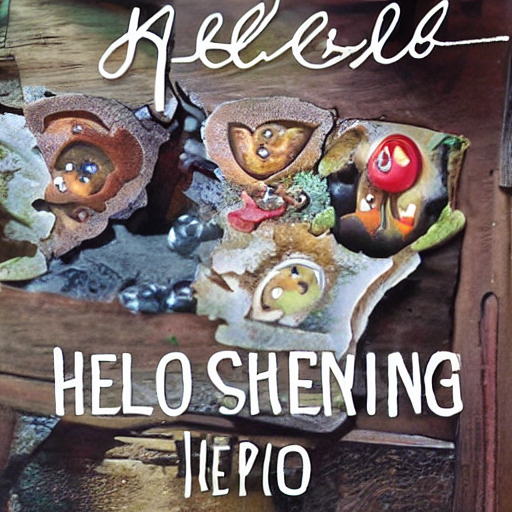

In [ ]:
import IPython.display as display
display.Image("hello.png")

In [ ]:
%%bash
python3 stable_diffusion.openvino/demo.py --prompt "cat driving a car" --output cat.png

ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.
tcmalloc: large alloc 3438092288 bytes == 0x326d8000 @  0x7f388d6e61e7 0x7f387ba863f6 0x7f387b74d1e3 0x7f37eef65944 0x7f387bc1549c 0x7f387b8776e5 0x7f387b7e2305 0x7f387c16395e 0x7f387c193d0e 0x58ec54 0x58fc01 0x51b7fd 0x5b41c5 0x4ba80a 0x537e46 0x58ff66 0x51bbc5 0x58f2a7 0x51740e 0x5b41c5 0x604133 0x606e06 0x606ecc 0x609aa6 0x64d332 0x64d4de 0x7f388d2e3c87 0x5b561a
32it [14:44, 27.64s/it]


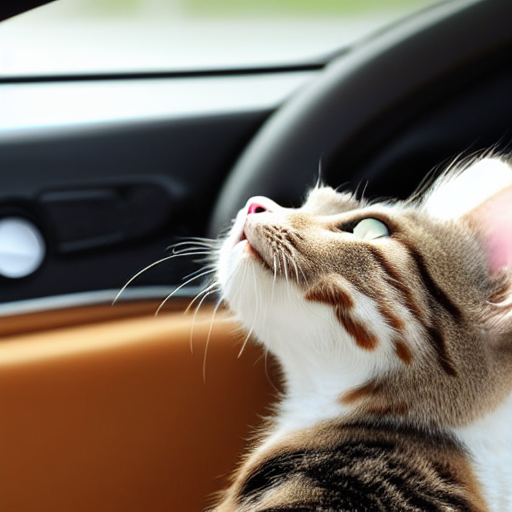

In [ ]:
import IPython.display as display
display.Image("cat.png")


## **Building and Running on docker**

In this step you will create a  `Dockerfile` to create your Docker deployment. The `Dockerfile` is a text document that contains the commands used to assemble the image.

First, create the `Dockerfile`.

Next, add your desired configuration to the `Dockerfile`. These commands specify how the image will be built, and what extra requirements will be included.

Dockerfile


```
FROM python:3.9.9-bullseye

WORKDIR /src

RUN apt-get update && \
    apt-get install -y \
    libgl1 libglib2.0-0 git-lfs

RUN git lfs install

COPY requirements.txt /src/

RUN pip3 install -r requirements.txt


COPY stable_diffusion_engine.py demo.py demo_web.py /src/
COPY data/ /src/data/

RUN git clone https://huggingface.co/openai/clip-vit-large-patch14
RUN git clone https://huggingface.co/bes-dev/stable-diffusion-v1-4-openvino

# download models
RUN python3 demo.py --num-inference-steps 1 --prompt "test" --output /tmp/test.jpg
```


We will use the `python:3.9.9-bullseye` image, and we will choose the src directory in the container as our work directory, we run the same commands for installing dependencies that we used locally, but we also add files and directories which are present on our local machine, we also run a test command, in the end, to check whether the script works

To Build the docker container run the docker build command


```
docker build -t <hub-user>/<repo-name>:<tag> .
```


Please replace

&lt;hub-user> with your docker hub username, If you don’t have a docker hub account [Follow these instructions to create docker account](https://docs.docker.com/docker-id/), and use the username of the account you created

&lt;repo-name> This is the name of the container, you can name it anything you want

&lt;tag> This is not required but you can use the latest tag

After you have build the container, the next step is to test it locally and then push it docker hub

Before pushing you first need to create a repo which you can create by following the instructions here [https://docs.docker.com/docker-hub/repos/](https://docs.docker.com/docker-hub/repos/)

Now you can push this repository to the registry designated by its name or tag.


```
 docker push <hub-user>/<repo-name>:<tag>
```


After the repo image has been pushed to docker hub, we can now use the container for running on bacalhau

```
bacalhau docker run \
jsacex/stable-diffusion \
-- python demo.py --prompt "First Humans On Mars" --output ../outputs/mars.png
```

Insalling bacalhau

In [ ]:
%%bash
curl -sL https://get.bacalhau.org/install.sh | bash

Your system is linux_amd64
No BACALHAU detected. Installing fresh BACALHAU CLI...
Getting the latest BACALHAU CLI...
Installing v0.2.3 BACALHAU CLI...
Verified OK
Extracting tarball ...
NOT verifying Bin
bacalhau installed into /usr/local/bin successfully.
Client Version: v0.2.3
Server Version: v0.2.3


In [ ]:
%%bash
echo $(bacalhau docker run jsacex/stable-diffusion --id-only  --wait --wait-timeout-secs 1000 -- python demo.py --prompt "First Humans On Mars" --output ../outputs/mars.png) > job_id.txt
cat job_id.txt


Running the commands will output a UUID (like `54506541-4eb9-45f4-a0b1-ea0aecd34b3e`). This is the ID of the job that was created. You can check the status of the job with the following command:


In [ ]:
%%bash
bacalhau list --id-filter $(cat job_id.txt)


Where it says "`Published `", that means the job is done, and we can get the results.

To find out more information about your job, run the following command:

In [ ]:
%%bash
bacalhau describe $(cat job_id.txt)

Since there is no error we can’t see any error instead we see the state of our job to be complete, that means 
we can download the results!
we create a temporary directory to save our results

In [ ]:
%%bash
mkdir results

To Download the results of your job, run 

---

the following command:

In [ ]:
%%bash
bacalhau get  $(cat job_id.txt)  --output-dir results

12:19:36.609 | INF bacalhau/get.go:67 > Fetching results of job 'ab354ccc-f02e-4262-ad0b-f33ec78803cc'...
2022/09/18 12:19:37 failed to sufficiently increase receive buffer size (was: 208 kiB, wanted: 2048 kiB, got: 416 kiB). See https://github.com/lucas-clemente/quic-go/wiki/UDP-Receive-Buffer-Size for details.
12:19:47.364 | INF ipfs/downloader.go:115 > Found 1 result shards, downloading to temporary folder.
12:19:51.091 | INF ipfs/downloader.go:195 > Combining shard from output volume 'outputs' to final location: '/content/results'


After the download has finished you should 
see the following contents in results directory

In [ ]:
%%bash
ls results/

shards	stderr	stdout	volumes



By Inspecting the Downloaded Results

We can find that our generated image is located in /volumes/outputs/mars.png


```
.
├── shards
│   └── job-2c281c1b-1a3e-4863-830f-8c48d117f6ea-shard-0-host-QmdZQ7ZbhnvWY1J12XYKGHApJ6aufKyLNSvf8jZBrBaAVL
│       ├── exitCode
│       ├── stderr
│       └── stdout
├── stderr
├── stdout
└── volumes
    └── outputs
        └── mars.png
```

In [ ]:
import IPython.display as display
display.Image("results/volumes/outputs/mars.png")